<a href="https://colab.research.google.com/github/tensorflow-project/FineTuning/blob/main/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tensorflow-project/FineTuning
#%cd FineTuning

Cloning into 'FineTuning'...
remote: Enumerating objects: 618, done.
remote: Counting objects: 100% (254/254), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 618 (delta 169), reused 141 (delta 90), pack-reused 364
Receiving objects: 100% (618/618), 96.82 MiB | 27.04 MiB/s, done.
Resolving deltas: 100% (435/435), done.


In [2]:
import sys
import os
from numpy import dot
#from numpy.linalg import norm
#from google.colab import drive
import numpy as np

py_file_location = "/content/FineTuning"
sys.path.append(os.path.abspath(py_file_location))
py_file_location = "/content/FineTuning/models"
sys.path.append(os.path.abspath(py_file_location))

import textual_inversion as txt

  Preparing metadata (setup.py) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
202761/202761 [==============================] - 0s 0us/step


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


198180272/198180272 [==============================] - 1s 0us/step
[[TensorShape([49409, 768])], [], []]
136824240/136824240 [==============================] - 1s 0us/step


In [3]:
sticker_embedding = []
cosine_similarity = []
broccoli = txt.get_embedding("broccoli")
cosine_similarity.append(txt.cosine_sim(broccoli, txt.get_embedding(txt.placeholder_token)))

25/25 [==============================] - 76s 2s/step


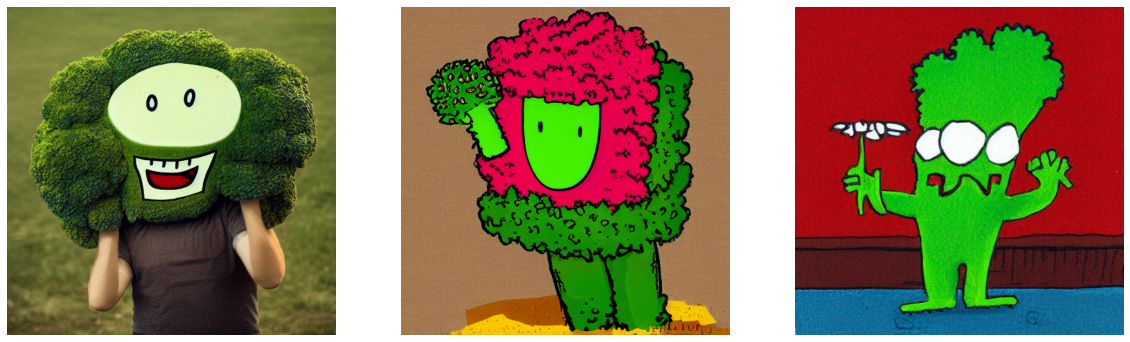

In [4]:
epochs = 1
epoch_num = list(range(epochs+1))
txt.training(epoch=epochs, model=txt.stable_diffusion, data= txt.train_ds)

In [ ]:
"""plt.plot(epoch_num, cosine_similarity)
plt.xlabel("Number of Epochs")
plt.ylabel("Cosine Similarity")
plt.title("Cosine Similarity between the basis and the new concept")
plt.show()"""

In [5]:
drive.mount("/content/drive")
path = '/content/drive/MyDrive/weights_with_function.npy'

Mounted at /content/drive


In [6]:
###get the weights of the text encoder and save the to google drive
text_encoder_weights = np.array(txt.stable_diffusion.text_encoder.get_weights())

### Save the weights array to a file on your Google Drive
np.save(path, text_encoder_weights)

<ipython-input-6-3b161e291148>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  text_encoder_weights = np.array(txt.stable_diffusion.text_encoder.get_weights())


In [ ]:
### klappt noch nicht
txt.cosine_plot(epoch_num, cosine_similarity)